In [49]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras.backend as K
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.layers import MaxPool2D, AvgPool2D
from tensorflow.keras.layers import Flatten, Activation
from tensorflow.keras.layers import Conv2D

from tensorflow.keras.datasets import mnist

# Exercise 1

In [30]:
(X_train, y_train), (X_test, y_test) = mnist.load_data('/tmp/mnist.npz')

In [31]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [36]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

(60000, 10)

In [41]:
K.clear_session()

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
activation (Activation)      (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [42]:
# print(X_train.shape)
# print(y_train)

model.fit(X_train, y_train_cat, batch_size=128, epochs=2, verbose=1, validation_split=0.3)

Epoch 1/2
329/329 [==============================] - 8s 24ms/step - loss: 0.2796 - accuracy: 0.9151 - val_loss: 0.1216 - val_accuracy: 0.9648
Epoch 2/2
329/329 [==============================] - 7s 22ms/step - loss: 0.0791 - accuracy: 0.9766 - val_loss: 0.0861 - val_accuracy: 0.9736


In [43]:
model.evaluate(X_test, y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.0706 - accuracy: 0.9765: 0s - loss: 0.0


[0.07055982202291489, 0.9764999747276306]

In [44]:
K.clear_session()

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
activation (Activation)      (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
activation_1 (Activation)    (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0

In [45]:
model.fit(X_train, y_train_cat, batch_size=128, epochs=2, verbose=1, validation_split=0.3)

Epoch 1/2
329/329 [==============================] - 11s 33ms/step - loss: 0.2523 - accuracy: 0.9215 - val_loss: 0.1104 - val_accuracy: 0.9643
Epoch 2/2
329/329 [==============================] - 10s 32ms/step - loss: 0.0651 - accuracy: 0.9796 - val_loss: 0.0804 - val_accuracy: 0.9742


In [46]:
model.evaluate(X_test, y_test_cat)

313/313 [==============================] - 2s 6ms/step - loss: 0.0652 - accuracy: 0.9791


[0.06520647555589676, 0.9790999889373779]

# Exercise 2

In [52]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.cifar10.load_data()

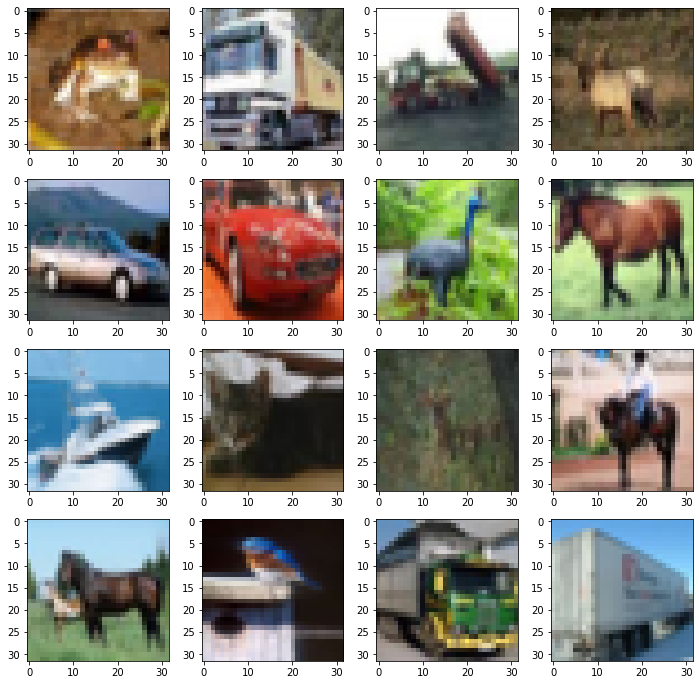

In [64]:
fig, ax = plt.subplots(4,4, figsize=(12,12))

for i in range(0,4):
    for j in range(0,4):
        ax[i][j].imshow(X_train[i*4+j])
        


In [65]:
X_train.shape

(50000, 32, 32, 3)

In [67]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [68]:
Y_train.shape

(60000,)

In [82]:
Y_train_cat = to_categorical(Y_train)
Y_test_cat = to_categorical(Y_test)

In [75]:
Y_train_cat.shape

(50000, 10)

In [78]:
K.clear_session()

model = Sequential()

model.add(Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [79]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        18464     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0

In [80]:
model.fit(X_train, Y_train_cat, batch_size=128, epochs=2, verbose=1, validation_split=0.3)

Epoch 1/2
274/274 [==============================] - 62s 226ms/step - loss: 1.7029 - accuracy: 0.3771 - val_loss: 1.4849 - val_accuracy: 0.4585
Epoch 2/2
274/274 [==============================] - 67s 245ms/step - loss: 1.3364 - accuracy: 0.5219 - val_loss: 1.2663 - val_accuracy: 0.5568


In [83]:
model.evaluate(X_test, Y_test_cat)

313/313 [==============================] - 4s 12ms/step - loss: 1.2598 - accuracy: 0.5552


[1.2597826719284058, 0.5551999807357788]